In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import itertools
import time

In [6]:
life = pd.read_csv('train.csv')
life['developing'] = life.status.apply(lambda x: 1 if x=='Developing'
                       else 0)

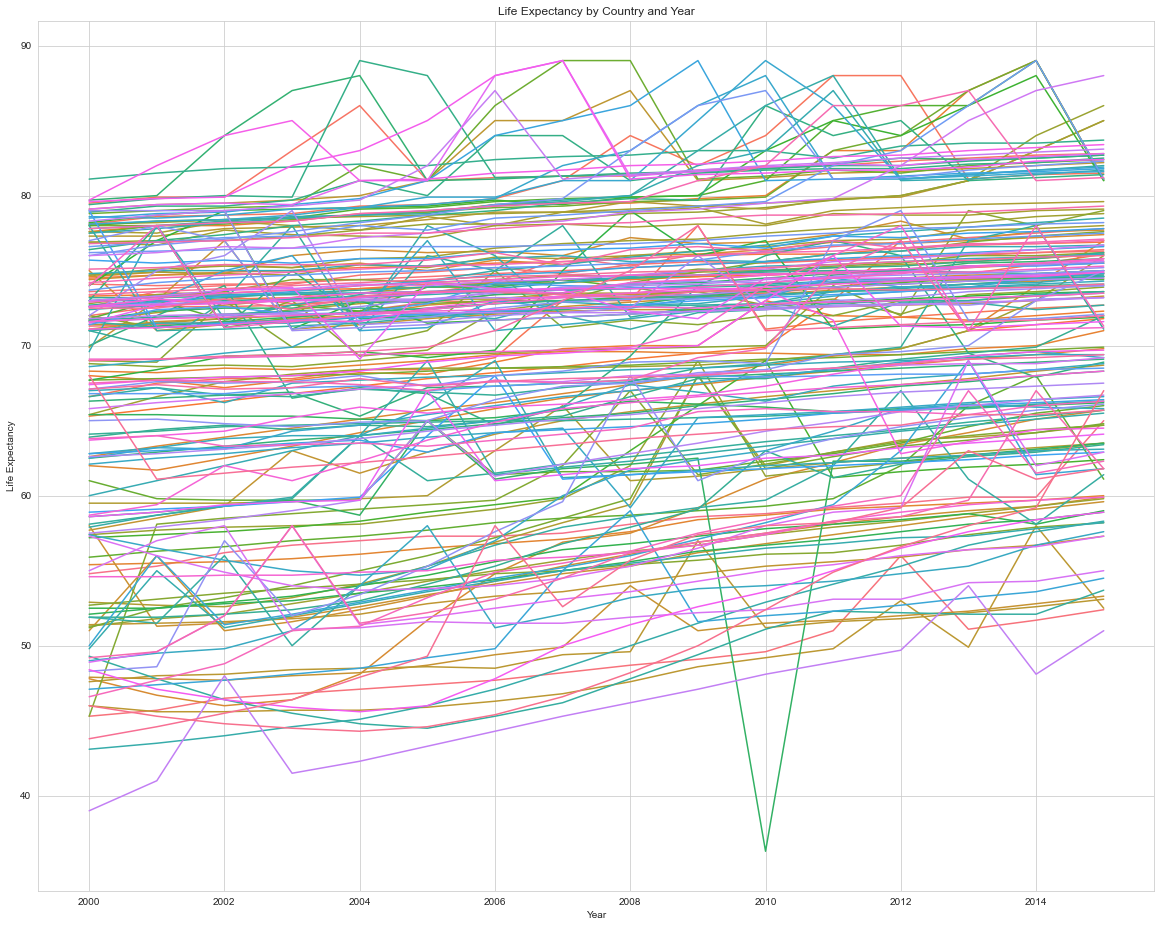

In [7]:
sns.set_style("whitegrid") # Optional: set plot style
plt.figure(figsize=(20, 16))
sns.lineplot(x="year", y="life_expectancy", hue="country", legend=False, data=life)

# Add axis labels and title
plt.xlabel("Year")
plt.ylabel("Life Expectancy")
plt.title("Life Expectancy by Country and Year")

# Show plot
plt.show()

In [31]:
life['life_expectancy_lag_one_year'] = life['life_expectancy'].shift(-1)
life['life_expectancy_lag_5_year'] = life['life_expectancy'].shift(-5)
life

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitisB,measles,...,HIV_AIDS,GDP,Population,thinness_1_19_years,thinness_5_9_years,income_composition_of_resources,schooling,developing,life_expectancy_lag_one_year,life_expectancy_lag_5_year
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,1,59.9,58.8
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,1,59.9,58.6
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,1,59.5,58.1
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,1,59.2,57.5
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,1,58.8,57.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2,1,44.5,NaN
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5,1,44.8,NaN
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0,1,45.3,NaN
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8,1,46.0,NaN


In [32]:
def build_model(features):
  X=sm.add_constant(life[features])
  y=life['life_expectancy']
  model = sm.OLS(y,X, missing='drop').fit()
  predictions = model.predict(X) 
  display(model.summary()) 
  res=y-predictions
  return model
model=build_model(['adult_mortality', 'schooling', 'percentage_expenditure', 'BMI', 'diphtheria', 'HIV_AIDS', 'income_composition_of_resources', 'life_expectancy_lag_one_year', 'life_expectancy_lag_5_year'])

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        life_expectancy   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     2896.
Date:                Tue, 28 Feb 2023   Prob (F-statistic):               0.00
Time:                        17:52:51   Log-Likelihood:                -6646.5
No. Observations:                2703   AIC:                         1.331e+04
Df Residuals:                    2693   BIC:                         1.337e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              22.0188      0.698     31.560      0.000      20.651      23.387
adult_mortality                    -0.0079      0.001    -12.713      0.000      -0.009      -0.007
schooling                           0.4875      0.032     15.240      0.000       0.425       0.550
percentage_expenditure              0.0002   2.95e-05      5.383      0.000       0.000       0.000
BMI                                 0.0147      0.003      4.261      0.000       0.008       0.021
diphtheria                          0.0235      0.003      8.784      0.000       0.018       0.029
HIV_AIDS                           -0.2508      0.014    -17.867      0.000      -0.278      -0.223
income_composition_of_resources     3.3399      0.455      7.333      0.000       2.447       4.233
life_expectancy_lag_one_year        0.5698      0.013     44.640      0.000       0.545       0.595
life_expectancy_lag_5_year         -0.0149      0.009     -1.739      0.082      -0.032       0.002
==============================================================================
Omnibus:                     1185.394   Durbin-Watson:                   1.662
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            28737.214
Skew:                          -1.525   Prob(JB):                         0.00
Kurtosis:                      18.680   Cond. No.                     2.85e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.85e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
test = life.copy()[life['year'] > 2010]
X=sm.add_constant(test[['adult_mortality', 'schooling', 'percentage_expenditure', 'BMI', 'diphtheria', 'HIV_AIDS', 'income_composition_of_resources', 'life_expectancy_lag_one_year', 'life_expectancy_lag_5_year']])
pred = model.predict(X)
rmse = np.sqrt(((test.life_expectancy-pred)**2).mean())
rmse

1.9917584427951383

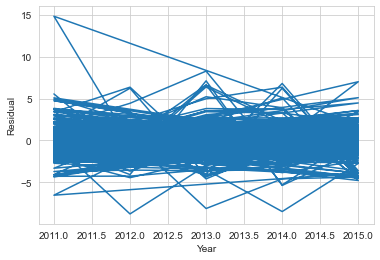

In [17]:
residual=test.life_expectancy-pred
def plt_residual(res):
  plt.plot(test.year, res) 
  plt.ylabel('Residual')
  plt.xlabel("Year")

plt_residual(residual)

In [18]:
residual = residual.to_frame()
residual = residual[residual[0] > 10]
outlier = test[test.index == 1126]
outlier

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitisB,measles,...,HIV_AIDS,GDP,Population,thinness_1_19_years,thinness_5_9_years,income_composition_of_resources,schooling,developing,life_expectancy_lag_one_year,life_expectancy_lag_5_year
1126,Haiti,2011,Developing,62.3,259.0,15,5.68,4.106484,NaN,0,...,1.5,74.935845,114554.0,4.0,4.0,0.47,8.7,1,36.3,61.1


Text(0.5, 1.0, 'Life Expectancy Haiti')

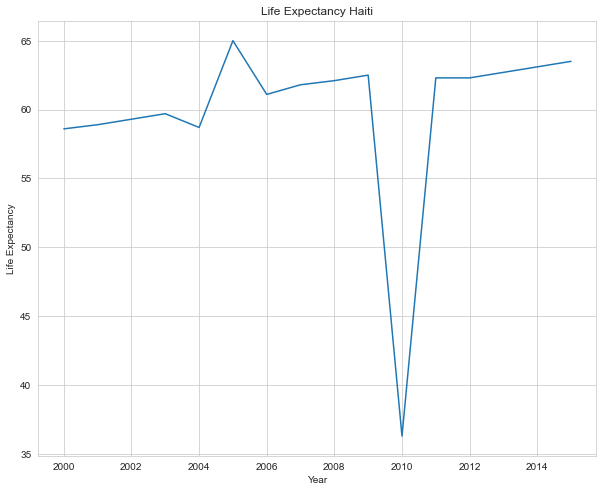

In [186]:
haiti = life[life['country'] == 'Haiti']
sns.set_style("whitegrid") # Optional: set plot style
plt.figure(figsize=(10, 8))
sns.lineplot(x="year", y="life_expectancy", hue="country", legend=False, data=haiti)

# Add axis labels and title
plt.xlabel("Year")
plt.ylabel("Life Expectancy")
plt.title("Life Expectancy Haiti")

<AxesSubplot:>

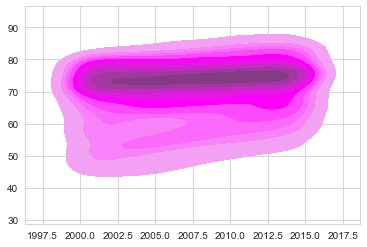

In [20]:
sns.kdeplot(life['year'].values, y=life['life_expectancy'].values,color='purple',shade=True )

## Ridge Regression 

In [33]:
life.head()

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitisB,measles,...,HIV_AIDS,GDP,Population,thinness_1_19_years,thinness_5_9_years,income_composition_of_resources,schooling,developing,life_expectancy_lag_one_year,life_expectancy_lag_5_year
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,1,59.9,58.8
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,1,59.9,58.6
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,1,59.5,58.1
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,1,59.2,57.5
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,1,58.8,57.3


In [180]:
X = life[life.life_expectancy.notna()]
X = X.loc[:,['adult_mortality', 'schooling', 'percentage_expenditure', 'BMI', 'diphtheria', 'HIV_AIDS', 'income_composition_of_resources', 'life_expectancy_lag_one_year', 'life_expectancy_lag_5_year']]
test = life[life.life_expectancy.notna()]
test = test[test.year > 2010]
test = test.loc[:,['adult_mortality', 'schooling', 'percentage_expenditure', 'BMI', 'diphtheria', 'HIV_AIDS', 'income_composition_of_resources', 'life_expectancy_lag_one_year', 'life_expectancy_lag_5_year']]
test_life = life[life.life_expectancy.notna()]
test_life = test_life[test_life.year > 2010]

In [165]:
from sklearn.impute import KNNImputer

In [166]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
inter = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)
test_inter = pd.DataFrame(scaler.fit_transform(test), columns = test.columns)
test_inter.head()

,adult_mortality,schooling,percentage_expenditure,BMI,diphtheria,HIV_AIDS,income_composition_of_resources,life_expectancy_lag_one_year,life_expectancy_lag_5_year
0,0.502879,0.339744,0.003659,0.226190,0.649485,0.0,0.2496,0.447818,0.426945
1,0.518234,0.333333,0.003774,0.219577,0.618557,0.0,0.2448,0.447818,0.423150
2,0.512476,0.326923,0.003759,0.212963,0.639175,0.0,0.2352,0.440228,0.413662
3,0.520154,0.320513,0.004014,0.206349,0.670103,0.0,0.2240,0.434535,0.402277
4,0.525912,0.301282,0.000364,0.201058,0.680412,0.0,0.2096,0.426945,0.398482


In [167]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
inter = pd.DataFrame(imputer.fit_transform(inter),columns = inter.columns)
test_inter = pd.DataFrame(imputer.fit_transform(test_inter),columns = test_inter.columns)

In [168]:
X = inter.copy() 

In [169]:
test = test_inter.copy()

In [170]:
y = life[life.life_expectancy.notna()]
y = y.life_expectancy

In [171]:
scaler = StandardScaler()

#The scaler object will contain the mean and variance of each column (predictor) of X. 
#These values will be useful to scale test data based on the same mean and variance as obtained on train data
scaler.fit(X)

#Using the scaler object (or the values of mean and variance stored in it) to standardize X (or train data)
Xstd = scaler.transform(X)

In [172]:
alphas = 10**np.linspace(10,-2,200)*0.5

In [173]:
coefs = []
for a in alphas:        
    ridge = Ridge(alpha = a)
    ridge.fit(Xstd, y)
    coefs.append(ridge.coef_)

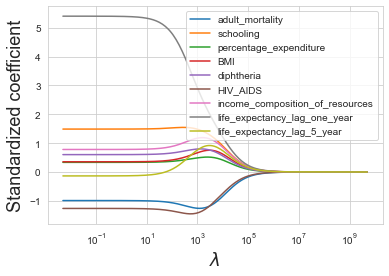

In [174]:
plt.xlabel('xlabel', fontsize=18)
plt.ylabel('ylabel', fontsize=18)
plt.plot(alphas, coefs)
plt.xscale('log')
plt.xlabel('$\lambda$')
plt.ylabel('Standardized coefficient')
plt.legend(X.columns);

In [175]:
lphas = 10**np.linspace(1.5,-3,200)*0.5
ridgecv = RidgeCV(alphas = alphas,store_cv_values=True)
ridgecv.fit(Xstd, y)

#Optimal value of the tuning parameter - lamda
ridgecv.alpha_

10.364608897976849

Text(0, 0.5, 'Cross-validation error')

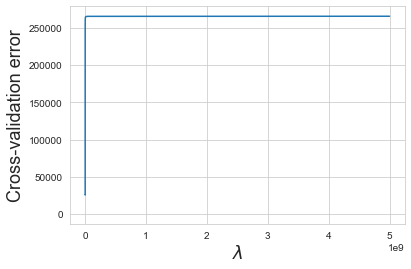

In [176]:
plt.xlabel('xlabel', fontsize=18)
plt.ylabel('ylabel', fontsize=18)
plt.plot(ridgecv.alphas,ridgecv.cv_values_.sum(axis=0))
plt.plot([ridgecv.alpha_,ridgecv.alpha_],[40,40.2],':')
plt.xlabel('$\lambda$')
plt.ylabel('Cross-validation error')

In [177]:
#Test dataset
Xtest = test.copy()

#Standardizing test data
Xtest_std = scaler.transform(Xtest)

In [178]:
ridge = Ridge(alpha = ridgecv.alpha_)
ridge.fit(Xstd, y)
pred=ridge.predict(Xtest_std)

In [181]:
np.sqrt(((pred-test_life.life_expectancy)**2).mean())

3.380827389860242

In [147]:
test

,adult_mortality,schooling,percentage_expenditure,BMI,diphtheria,HIV_AIDS,income_composition_of_resources,life_expectancy_lag_one_year,life_expectancy_lag_5_year
0,0.362881,0.487923,0.003659,0.236292,0.649485,0.000000,0.505274,0.447818,0.426945
1,0.373961,0.483092,0.003774,0.229765,0.618557,0.000000,0.502110,0.447818,0.423150
2,0.369806,0.478261,0.003759,0.223238,0.639175,0.000000,0.495781,0.440228,0.413662
3,0.375346,0.473430,0.004014,0.216710,0.670103,0.000000,0.488397,0.434535,0.402277
4,0.379501,0.458937,0.000364,0.211488,0.680412,0.000000,0.478903,0.426945,0.398482
...,...,...,...,...,...,...,...,...,...
2923,1.000000,0.444444,0.000000,0.340731,0.649485,0.663366,0.429325,0.155598,0.340417
2924,0.988920,0.458937,0.000000,0.335509,0.680412,0.724752,0.440928,0.161290,0.340417
2925,0.099723,0.483092,0.000000,0.330287,0.711340,0.786139,0.450422,0.170778,0.469070
2926,0.948753,0.473430,0.000000,0.325065,0.752577,0.831683,0.450422,0.184061,0.401139


In [182]:
ridge.coef_

array([-0.99858248,  1.49261258,  0.33801978,  0.36063913,  0.60884271,
       -1.27385175,  0.79254958,  5.32455726, -0.10800727])

In [183]:
r2_score(ridge.predict(Xstd),y)

0.8955998529662232

In [184]:
r2_score(pred,test_life.life_expectancy)

0.8725345330477219

# Charts and Graphs 

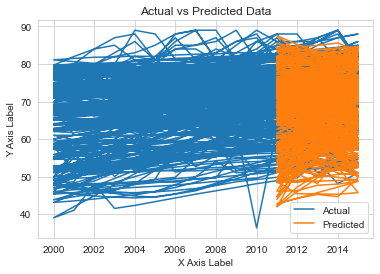

In [190]:
# assuming pred is a numpy array with the predicted values and df is the pandas dataframe with the entire dataset
chart = test_life.copy()
chart['pred'] = pred

x_actual = life['year']
y_actual = life['life_expectancy']
x_pred = chart['year']
y_pred = chart['pred']

# create a line chart with seaborn for actual values
plt.plot(x_actual, y_actual, label='Actual')

# plot predicted values on a separate plot
plt.plot(x_pred, y_pred, label='Predicted')

# set chart labels and title
plt.xlabel('X Axis Label')
plt.ylabel('Y Axis Label')
plt.title('Actual vs Predicted Data')

# show the chart
plt.legend()
plt.show()


In [191]:
chart

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitisB,measles,...,GDP,Population,thinness_1_19_years,thinness_5_9_years,income_composition_of_resources,schooling,developing,life_expectancy_lag_one_year,life_expectancy_lag_5_year,pred
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,584.259210,33736494.0,17.2,17.3,0.479,10.1,1,59.9,58.8,58.493455
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,612.696514,327582.0,17.5,17.5,0.476,10.0,1,59.9,58.6,58.245968
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,631.744976,31731688.0,17.7,17.7,0.470,9.9,1,59.5,58.1,58.012481
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,669.959000,3696958.0,17.9,18.0,0.463,9.8,1,59.2,57.5,57.778910
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,63.537231,2978599.0,18.2,18.2,0.454,9.5,1,58.8,57.3,57.306661
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2922,Zimbabwe,2015,Developing,67.0,336.0,22,NaN,0.000000,87.0,0,...,118.693830,15777451.0,5.6,5.5,0.507,10.3,1,59.2,52.4,53.475311
2923,Zimbabwe,2014,Developing,59.2,371.0,23,6.50,10.822595,91.0,0,...,127.474620,15411675.0,5.9,5.7,0.498,10.3,1,58.0,50.0,52.407249
2924,Zimbabwe,2013,Developing,58.0,399.0,25,6.39,10.666707,95.0,0,...,111.227396,155456.0,6.2,6.0,0.488,10.4,1,56.6,48.2,50.529720
2925,Zimbabwe,2012,Developing,56.6,429.0,26,6.09,92.602336,97.0,0,...,955.648466,1471826.0,6.5,6.4,0.464,9.8,1,54.9,46.6,47.166013


# No Haiti 

In [203]:
no_haiti = life[life['country'] != 'Haiti']
def build_model(features):
  X=sm.add_constant(no_haiti[features])
  y=no_haiti['life_expectancy']
  model = sm.OLS(y,X, missing='drop').fit()
  predictions = model.predict(X) 
  display(model.summary()) 
  res=y-predictions
  return model
model=build_model(['adult_mortality', 'schooling', 'percentage_expenditure', 'BMI', 'diphtheria', 'HIV_AIDS', 'income_composition_of_resources', 'life_expectancy_lag_one_year', 'life_expectancy_lag_5_year'])

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        life_expectancy   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     2982.
Date:                Wed, 01 Mar 2023   Prob (F-statistic):               0.00
Time:                        09:57:55   Log-Likelihood:                -6559.3
No. Observations:                2687   AIC:                         1.314e+04
Df Residuals:                    2677   BIC:                         1.320e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              21.4166      0.693     30.916      0.000      20.058      22.775
adult_mortality                    -0.0074      0.001    -11.955      0.000      -0.009      -0.006
schooling                           0.4757      0.031     15.104      0.000       0.414       0.537
percentage_expenditure              0.0002   2.89e-05      5.416      0.000      0.0001       0.000
BMI                                 0.0149      0.003      4.370      0.000       0.008       0.022
diphtheria                          0.0228      0.003      8.636      0.000       0.018       0.028
HIV_AIDS                           -0.2485      0.014    -17.943      0.000      -0.276      -0.221
income_composition_of_resources     3.2916      0.448      7.354      0.000       2.414       4.169
life_expectancy_lag_one_year        0.5815      0.013     45.878      0.000       0.557       0.606
life_expectancy_lag_5_year         -0.0159      0.008     -1.874      0.061      -0.032       0.001
==============================================================================
Omnibus:                     1199.612   Durbin-Watson:                   1.637
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            29943.690
Skew:                          -1.555   Prob(JB):                         0.00
Kurtosis:                      19.055   Cond. No.                     2.88e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.88e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [204]:
test_no_haiti = no_haiti.copy()[no_haiti['year'] > 2010]
no_haiti=sm.add_constant(test_no_haiti[['adult_mortality', 'schooling', 'percentage_expenditure', 'BMI', 'diphtheria', 'HIV_AIDS', 'income_composition_of_resources', 'life_expectancy_lag_one_year', 'life_expectancy_lag_5_year']])
pred = model.predict(no_haiti)
rmse = np.sqrt(((test_no_haiti.life_expectancy-pred)**2).mean())
rmse

1.9119569446927192

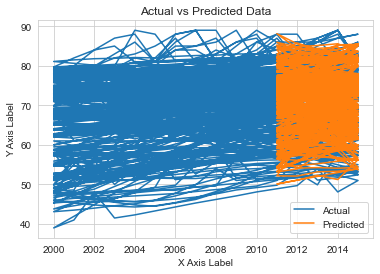

In [205]:
# assuming pred is a numpy array with the predicted values and df is the pandas dataframe with the entire dataset
chart = test_no_haiti.copy()
chart['pred'] = pred

no_haiti = life[life['country'] != 'Haiti']

x_actual = no_haiti['year']
y_actual = no_haiti['life_expectancy']
x_pred = chart['year']
y_pred = chart['pred']

# create a line chart with seaborn for actual values
plt.plot(x_actual, y_actual, label='Actual')

# plot predicted values on a separate plot
plt.plot(x_pred, y_pred, label='Predicted')

# set chart labels and title
plt.xlabel('X Axis Label')
plt.ylabel('Y Axis Label')
plt.title('Actual vs Predicted Data')

# show the chart
plt.legend()
plt.show()

## Splitting Data into a test and train dataset

In [259]:
no_haiti = life[life['country'] != 'Haiti']
train = no_haiti[no_haiti.year <= 2012]
test_newest = no_haiti[no_haiti.year > 2012]

In [260]:
def build_model(features):
  X=sm.add_constant(train[features])
  y=train['life_expectancy']
  model = sm.OLS(y,X, missing='drop').fit()
  predictions = model.predict(X) 
  display(model.summary()) 
  res=y-predictions
  return model
model=build_model(['adult_mortality', 'schooling', 'percentage_expenditure', 'BMI', 'diphtheria', 'HIV_AIDS', 'income_composition_of_resources', 'life_expectancy_lag_one_year', 'life_expectancy_lag_5_year'])

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        life_expectancy   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     2246.
Date:                Wed, 01 Mar 2023   Prob (F-statistic):               0.00
Time:                        11:05:07   Log-Likelihood:                -5427.3
No. Observations:                2177   AIC:                         1.087e+04
Df Residuals:                    2167   BIC:                         1.093e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              23.2400      0.783     29.675      0.000      21.704      24.776
adult_mortality                    -0.0077      0.001    -11.001      0.000      -0.009      -0.006
schooling                           0.5181      0.035     14.623      0.000       0.449       0.588
percentage_expenditure              0.0002   3.49e-05      5.110      0.000       0.000       0.000
BMI                                 0.0187      0.004      4.568      0.000       0.011       0.027
diphtheria                          0.0251      0.003      8.260      0.000       0.019       0.031
HIV_AIDS                           -0.2640      0.015    -17.625      0.000      -0.293      -0.235
income_composition_of_resources     3.0602      0.480      6.375      0.000       2.119       4.002
life_expectancy_lag_one_year        0.5553      0.014     39.827      0.000       0.528       0.583
life_expectancy_lag_5_year         -0.0253      0.009     -2.752      0.006      -0.043      -0.007
==============================================================================
Omnibus:                      895.695   Durbin-Watson:                   1.581
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            17527.888
Skew:                          -1.446   Prob(JB):                         0.00
Kurtosis:                      16.597   Cond. No.                     2.76e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.76e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [261]:
X=sm.add_constant(test_newest[['adult_mortality', 'schooling', 'percentage_expenditure', 'BMI', 'diphtheria', 'HIV_AIDS', 'income_composition_of_resources', 'life_expectancy_lag_one_year', 'life_expectancy_lag_5_year']])
pred = model.predict(X)
rmse = np.sqrt(((test_newest.life_expectancy-pred)**2).mean())
rmse

2.076087314465567

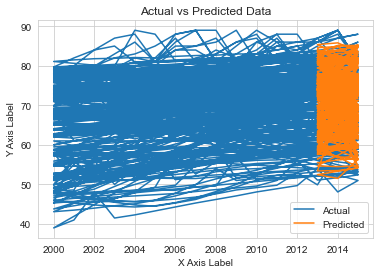

In [209]:
chart = test_newest.copy()
chart['pred'] = pred

x_actual = no_haiti['year']
y_actual = no_haiti['life_expectancy']
x_pred = chart['year']
y_pred = chart['pred']

# create a line chart with seaborn for actual values
plt.plot(x_actual, y_actual, label='Actual')

# plot predicted values on a separate plot
plt.plot(x_pred, y_pred, label='Predicted')

# set chart labels and title
plt.xlabel('X Axis Label')
plt.ylabel('Y Axis Label')
plt.title('Actual vs Predicted Data')

# show the chart
plt.legend()
plt.show()

In [218]:
train = life[life.year <= 2010]
test_newest = life[life.year > 2010]

In [219]:
def build_model(features):
  X=sm.add_constant(train[features])
  y=train['life_expectancy']
  model = sm.OLS(y,X, missing='drop').fit()
  predictions = model.predict(X) 
  display(model.summary()) 
  res=y-predictions
  return model
model=build_model(['adult_mortality', 'schooling', 'percentage_expenditure', 'BMI', 'diphtheria', 'HIV_AIDS', 'income_composition_of_resources', 'life_expectancy_lag_one_year', 'life_expectancy_lag_5_year'])

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        life_expectancy   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     1710.
Date:                Wed, 01 Mar 2023   Prob (F-statistic):               0.00
Time:                        10:02:33   Log-Likelihood:                -4725.9
No. Observations:                1848   AIC:                             9472.
Df Residuals:                    1838   BIC:                             9527.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              25.2368      0.881     28.660      0.000      23.510      26.964
adult_mortality                    -0.0087      0.001    -11.228      0.000      -0.010      -0.007
schooling                           0.5717      0.040     14.345      0.000       0.494       0.650
percentage_expenditure              0.0002   4.28e-05      4.366      0.000       0.000       0.000
BMI                                 0.0200      0.005      4.136      0.000       0.011       0.030
diphtheria                          0.0284      0.003      8.346      0.000       0.022       0.035
HIV_AIDS                           -0.2716      0.016    -16.670      0.000      -0.304      -0.240
income_composition_of_resources     2.8917      0.519      5.577      0.000       1.875       3.909
life_expectancy_lag_one_year        0.5249      0.015     34.437      0.000       0.495       0.555
life_expectancy_lag_5_year         -0.0335      0.010     -3.322      0.001      -0.053      -0.014
==============================================================================
Omnibus:                      705.941   Durbin-Watson:                   1.578
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10614.856
Skew:                          -1.376   Prob(JB):                         0.00
Kurtosis:                      14.414   Cond. No.                     2.53e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.53e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [220]:
X=sm.add_constant(test_newest[['adult_mortality', 'schooling', 'percentage_expenditure', 'BMI', 'diphtheria', 'HIV_AIDS', 'income_composition_of_resources', 'life_expectancy_lag_one_year', 'life_expectancy_lag_5_year']])
pred = model.predict(X)
rmse = np.sqrt(((test_newest.life_expectancy-pred)**2).mean())
rmse

2.146453846948646

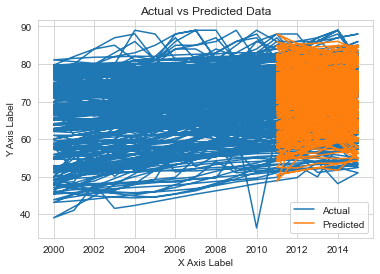

In [221]:
chart = test_newest.copy()
chart['pred'] = pred

x_actual = life['year']
y_actual = life['life_expectancy']
x_pred = chart['year']
y_pred = chart['pred']

# create a line chart with seaborn for actual values
plt.plot(x_actual, y_actual, label='Actual')

# plot predicted values on a separate plot
plt.plot(x_pred, y_pred, label='Predicted')

# set chart labels and title
plt.xlabel('X Axis Label')
plt.ylabel('Y Axis Label')
plt.title('Actual vs Predicted Data')

# show the chart
plt.legend()
plt.show()

# Ridge Again

In [222]:
X = life[life.life_expectancy.notna()]
X = X[X['country'] != 'Haiti']
X = X[X.year <= 2010]
X = X.loc[:,['adult_mortality', 'schooling', 'percentage_expenditure', 'BMI', 'diphtheria', 'HIV_AIDS', 'income_composition_of_resources', 'life_expectancy_lag_one_year', 'life_expectancy_lag_5_year']]
test = life[life.life_expectancy.notna()]
test = test[test['country'] != 'Haiti']
test = test[test.year > 2010]
test = test.loc[:,['adult_mortality', 'schooling', 'percentage_expenditure', 'BMI', 'diphtheria', 'HIV_AIDS', 'income_composition_of_resources', 'life_expectancy_lag_one_year', 'life_expectancy_lag_5_year']]
test_life = life[life.life_expectancy.notna()]
test_life = test_life[test_life['country'] != 'Haiti']
test_life = test_life[test_life.year > 2010]

In [223]:
scaler = MinMaxScaler()
inter = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)
test_inter = pd.DataFrame(scaler.fit_transform(test), columns = test.columns)
test_inter.head()

,adult_mortality,schooling,percentage_expenditure,BMI,diphtheria,HIV_AIDS,income_composition_of_resources,life_expectancy_lag_one_year,life_expectancy_lag_5_year
0,0.502879,0.339744,0.003659,0.226190,0.649485,0.0,0.2496,0.288509,0.324385
1,0.518234,0.333333,0.003774,0.219577,0.618557,0.0,0.2448,0.288509,0.319911
2,0.512476,0.326923,0.003759,0.212963,0.639175,0.0,0.2352,0.278729,0.308725
3,0.520154,0.320513,0.004014,0.206349,0.670103,0.0,0.2240,0.271394,0.295302
4,0.525912,0.301282,0.000364,0.201058,0.680412,0.0,0.2096,0.261614,0.290828


In [224]:
imputer = KNNImputer(n_neighbors=5)
inter = pd.DataFrame(imputer.fit_transform(inter),columns = inter.columns)
test_inter = pd.DataFrame(imputer.fit_transform(test_inter),columns = test_inter.columns)

In [226]:
X = inter.copy()
test = test_inter.copy()
y = life[life.life_expectancy.notna()]
y = y[y['country'] != 'Haiti']
y = y[y.year <= 2010]
y = y.life_expectancy

In [227]:
scaler = StandardScaler()

#The scaler object will contain the mean and variance of each column (predictor) of X. 
#These values will be useful to scale test data based on the same mean and variance as obtained on train data
scaler.fit(X)

#Using the scaler object (or the values of mean and variance stored in it) to standardize X (or train data)
Xstd = scaler.transform(X)

In [228]:
alphas = 10**np.linspace(10,-2,200)*0.5

In [229]:
coefs = []
for a in alphas:        
    ridge = Ridge(alpha = a)
    ridge.fit(Xstd, y)
    coefs.append(ridge.coef_)

In [230]:
lphas = 10**np.linspace(1.5,-3,200)*0.5
ridgecv = RidgeCV(alphas = alphas,store_cv_values=True)
ridgecv.fit(Xstd, y)

#Optimal value of the tuning parameter - lamda
ridgecv.alpha_

11.908427759880803

In [231]:
#Test dataset
Xtest = test.copy()

#Standardizing test data
Xtest_std = scaler.transform(Xtest)

In [232]:
ridge = Ridge(alpha = ridgecv.alpha_)
ridge.fit(Xstd, y)
pred=ridge.predict(Xtest_std)

In [233]:
np.sqrt(((pred-test_life.life_expectancy)**2).mean())

5.275007034452087

In [237]:
ridge.coef_

array([-1.07671704,  1.72175194,  0.39611791,  0.51246679,  0.78150628,
       -1.63511381,  0.74699369,  5.05687778, -0.27330192])

In [262]:
arr = ['adult_mortality', 'schooling', 'percentage_expenditure', 'BMI', 'diphtheria', 'HIV_AIDS', 'income_composition_of_resources', 'life_expectancy_lag_one_year', 'life_expectancy_lag_5_year']

In [264]:
for a, b in zip(arr, ridge.coef_):
    print(f"[{a}]: ridge.coef_[{b}]")

[adult_mortality]: ridge.coef_[-1.0767170416570375]
[schooling]: ridge.coef_[1.7217519360445552]
[percentage_expenditure]: ridge.coef_[0.3961179112497399]
[BMI]: ridge.coef_[0.5124667889552645]
[diphtheria]: ridge.coef_[0.7815062809356061]
[HIV_AIDS]: ridge.coef_[-1.635113806168988]
[income_composition_of_resources]: ridge.coef_[0.7469936918017196]
[life_expectancy_lag_one_year]: ridge.coef_[5.056877776864674]
[life_expectancy_lag_5_year]: ridge.coef_[-0.27330192077388243]


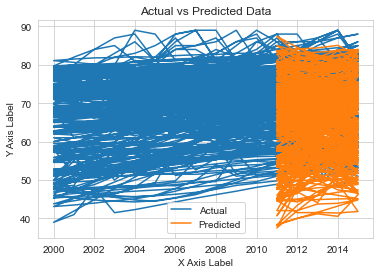

In [238]:
chart = test_life.copy()
chart['pred'] = pred

x_actual = no_haiti['year']
y_actual = no_haiti['life_expectancy']
x_pred = chart['year']
y_pred = chart['pred']

# create a line chart with seaborn for actual values
plt.plot(x_actual, y_actual, label='Actual')

# plot predicted values on a separate plot
plt.plot(x_pred, y_pred, label='Predicted')

# set chart labels and title
plt.xlabel('X Axis Label')
plt.ylabel('Y Axis Label')
plt.title('Actual vs Predicted Data')

# show the chart
plt.legend()
plt.show()

# Standard Deviation and Mean

In [267]:
grouped = no_haiti.groupby('year')['life_expectancy']
result = grouped.agg(['mean', 'std'])
print(result)

           mean        std
year                      
2000  66.795055  10.306042
2001  67.174176  10.199314
2002  67.395604  10.072367
2003  67.475824  10.139250
2004  67.695604  10.132426
2005  68.226923   9.823638
2006  68.709341   9.826071
2007  69.075824   9.630027
2008  69.468132   9.211821
2009  69.979121   8.996857
2010  70.234066   8.983093
2011  70.700000   8.927975
2012  70.964286   8.561715
2013  71.282967   8.412959
2014  71.582967   8.561386
2015  71.661538   8.123620
